In [1]:
import numpy as np
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler


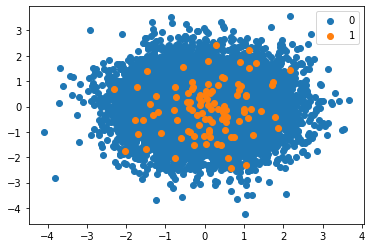

In [13]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=5, n_redundant=0,
    n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

counter = Counter(y)

for label, _ in counter.items():
    row_ix = np.where(y == label)[0]
    plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

plt.legend()
plt.show()

In [3]:
# define pipeline
model = DecisionTreeClassifier()

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.754


In [4]:
# define pipeline
model = DecisionTreeClassifier()
over = SMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.801


In [5]:
# define pipeline
model = DecisionTreeClassifier()
over = BorderlineSMOTE(sampling_strategy=0.1)
steps = [('over', over), ('model', model)]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.793


In [6]:
# Synthsonic
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf


trow = np.where(y == 1)[0]
m = X[trow, :]

kde = KDECopulaNNPdf()
kde = kde.fit(m)

prop = counter[0] - counter[1]

x_g, weight = kde.sample(n_samples=prop)


x_synth = np.concatenate([X,x_g])
y3_synth = np.concatenate([y,np.ones(x_g.shape[0])])

n_quantiles (500) is greater than the total number of samples (100). n_quantiles is set to num samples.
Building tree: 100%|██████████| 6/6.0 [00:00<00:00, 4866.72it/s]
Generating for node: 4: 100%|██████████| 5/5 [00:01<00:00,  4.95it/s]
/Users/tristenmarto/anaconda3/lib/python3.7/site-packages/sklearn/isotonic.py:71: UserWarning: Confidence interval of the Spearman correlation coefficient spans zero. Determination of ``increasing`` may be suspect.
  warnings.warn("Confidence interval of the Spearman "


In [7]:
model = DecisionTreeClassifier()

# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x_synth, y3_synth, scoring='roc_auc', cv=cv, n_jobs=-1)
print('Mean ROC AUC: %.3f' % np.mean(scores))

Mean ROC AUC: 0.985


# plots of oversample

In [8]:
def plotter(X,y,title) :
    counter = Counter(y)

    for label, _ in counter.items():
        row_ix = np.where(y == label)[0]
        plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))

    plt.title(title)
    plt.legend()
    plt.show()
    
    print(counter)

In [9]:
smote = SMOTE()
bsmote = BorderlineSMOTE()


x1,y1 = smote.fit_resample(X,y)

# borderline smote
x2,y2 = bsmote.fit_resample(X,y)

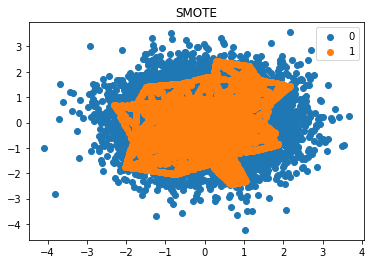

Counter({0: 9900, 1: 9900})


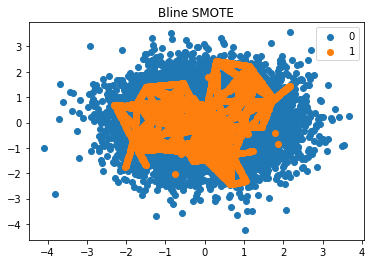

Counter({0: 9900, 1: 9900})


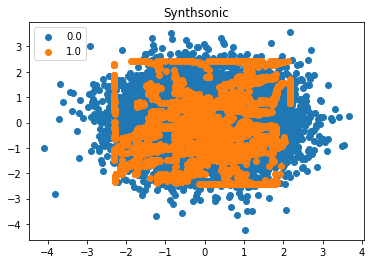

Counter({0.0: 9900, 1.0: 9900})


In [10]:
plotter(x1,y1,"SMOTE")

plotter(x2,y2,"Bline SMOTE")

plotter(x_synth,y3_synth,"Synthsonic")

In [11]:
kde.numerical_columns, kde.categorical_columns

([0, 1, 2, 3, 4], [])